In [132]:
import pandas as pd
import numpy as np
import ast

In [2]:
business = pd.read_csv('../dataset/processed/business.csv')
business.shape

(3829, 14)

In [3]:
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107.0,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106.0,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
2,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147.0,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': ""u'quiet'"", 'GoodForMeal': ""{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20..."
3,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147.0,39.939825,-75.157447,4.0,65,0,"{'Smoking': ""u'no'"", 'NoiseLevel': ""u'average'...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ..."
4,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127.0,40.022466,-75.218314,3.0,41,0,"{'RestaurantsReservations': 'False', 'Caters':...","Pizza, Restaurants, Salad, Soup","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-1..."


In [4]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3829 entries, 0 to 3828
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   3829 non-null   object 
 1   name          3829 non-null   object 
 2   address       3815 non-null   object 
 3   city          3829 non-null   object 
 4   state         3829 non-null   object 
 5   postal_code   3828 non-null   float64
 6   latitude      3829 non-null   float64
 7   longitude     3829 non-null   float64
 8   stars         3829 non-null   float64
 9   review_count  3829 non-null   int64  
 10  is_open       3829 non-null   int64  
 11  attributes    3829 non-null   object 
 12  categories    3829 non-null   object 
 13  hours         3530 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 418.9+ KB


In [5]:
business.isnull().sum()

business_id       0
name              0
address          14
city              0
state             0
postal_code       1
latitude          0
longitude         0
stars             0
review_count      0
is_open           0
attributes        0
categories        0
hours           299
dtype: int64

<AxesSubplot:>

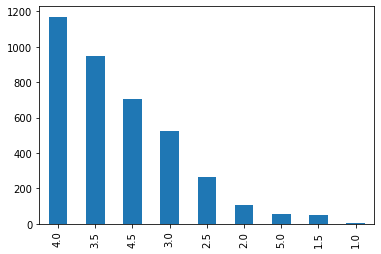

In [9]:
business.stars.value_counts().plot(kind='bar')

In [175]:
business['attribute_dict'] = business['attributes'].apply(lambda x: ast.literal_eval(x))

In [176]:
business.head(1)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,attribute_dict
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107.0,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...","{'RestaurantsDelivery': 'False', 'OutdoorSeati..."


In [177]:
attributes = []

for each in business['attribute_dict']:
    attributes.extend(each.keys())
    
attributes = set(attributes)
print(len(attributes))

37


In [178]:
attributes

{'AgesAllowed',
 'Alcohol',
 'Ambience',
 'BYOB',
 'BYOBCorkage',
 'BestNights',
 'BikeParking',
 'BusinessAcceptsBitcoin',
 'BusinessAcceptsCreditCards',
 'BusinessParking',
 'ByAppointmentOnly',
 'Caters',
 'CoatCheck',
 'Corkage',
 'DietaryRestrictions',
 'DogsAllowed',
 'DriveThru',
 'GoodForDancing',
 'GoodForKids',
 'GoodForMeal',
 'HappyHour',
 'HasTV',
 'Music',
 'NoiseLevel',
 'Open24Hours',
 'OutdoorSeating',
 'RestaurantsAttire',
 'RestaurantsCounterService',
 'RestaurantsDelivery',
 'RestaurantsGoodForGroups',
 'RestaurantsPriceRange2',
 'RestaurantsReservations',
 'RestaurantsTableService',
 'RestaurantsTakeOut',
 'Smoking',
 'WheelchairAccessible',
 'WiFi'}

In [179]:
business['attribute_dict'][0]

{'RestaurantsDelivery': 'False',
 'OutdoorSeating': 'False',
 'BusinessAcceptsCreditCards': 'False',
 'BusinessParking': "{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}",
 'BikeParking': 'True',
 'RestaurantsPriceRange2': '1',
 'RestaurantsTakeOut': 'True',
 'ByAppointmentOnly': 'False',
 'WiFi': "u'free'",
 'Alcohol': "u'none'",
 'Caters': 'True'}

In [180]:
q = business['attribute_dict'][0]

In [181]:
q

{'RestaurantsDelivery': 'False',
 'OutdoorSeating': 'False',
 'BusinessAcceptsCreditCards': 'False',
 'BusinessParking': "{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}",
 'BikeParking': 'True',
 'RestaurantsPriceRange2': '1',
 'RestaurantsTakeOut': 'True',
 'ByAppointmentOnly': 'False',
 'WiFi': "u'free'",
 'Alcohol': "u'none'",
 'Caters': 'True'}

In [182]:
a = q.get('businessparking', '')
b = ast.literal_eval(a)

SyntaxError: unexpected EOF while parsing (<unknown>, line 0)

In [154]:
for key, value in b.items():
        # Create new keys in the main dictionary for each key in the nested dictionary
        new_key = f'BusinessParking_{key}'
        q[new_key] = value

    # Remove the original 'BusinessParking' key from the main dictionary
del q['BusinessParking']

In [155]:
q

{'RestaurantsDelivery': 'False',
 'OutdoorSeating': 'False',
 'BusinessAcceptsCreditCards': 'False',
 'BikeParking': 'True',
 'RestaurantsPriceRange2': '1',
 'RestaurantsTakeOut': 'True',
 'ByAppointmentOnly': 'False',
 'WiFi': "u'free'",
 'Alcohol': "u'none'",
 'Caters': 'True',
 'BusinessParking_garage': False,
 'BusinessParking_street': True,
 'BusinessParking_validated': False,
 'BusinessParking_lot': False,
 'BusinessParking_valet': False}